# Нейронные сети












## Отступление 1. Логистическая регрессия

Ранее мы познакомились с линейной моделью:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_j$ - $j$-ый признак объекта $x$, $w_j$ - вес $j$-го признака, $b$ - bias (смещение, свободный член), $k$ - количество признаков объектов. Иногда вместо $b$ используют обозначение $w_0$, а также вводят дополнительный фиктивный признак $x_0$, который всегда равен 1. (В такой модели будет $k+1$ признаков).

Напомню про **минимизацию эмпирического риска** для линейной регрессии:
$$ Q (w) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\sum\limits_{j=0}^k w_j x_j^{(i)}  - y^{(i)})^2 $$

Также напомню, что линейную модель можно использовать для решения задани классификации. Например так:
$$ \hat{y} = sign(Xw),$$
где $sign$ функция, которая показывает знак выражения, записанного в скобках. И тогда $\hat{y} = \lbrace -1, 1 \rbrace$

Введём понятие отступа (margin) объекта:
$$ M(x_i) = y_i*\hat{y_i}$$

Отступ можно понимать как «степень погруженности» объекта в свой класс. Чем меньше значение отступа $M(x_i)$, тем ближе объект подходит к границе классов. Отступ $M(x_i)$ отрицателен тогда и только тогда, когда алгоритм $a(x,w)$ допускает ошибку на объекте $x_i$. Число ошибок классификации можно записать через отступы (это и есть эмпирический риск в задаче классификации для линейной модели):
$$ Q(w) = \sum\limits_{i=1}^\ell [M(x_i)<0]$$
В этой формуле внутри суммы используется [скобка Айверсона](https://ru.wikipedia.org/wiki/%D0%A1%D0%BA%D0%BE%D0%B1%D0%BA%D0%B0_%D0%90%D0%B9%D0%B2%D0%B5%D1%80%D1%81%D0%BE%D0%BD%D0%B0).

Под знаком суммы стоит пороговая функция потерь, поэтому данный функционал не является ни выпуклым, ни даже непрерывным, и минимизировать его неудобно. Идея заключается в том, чтобы заменить пороговую функцию потерь непрерывной оценкой сверху:

$$ [M<0]  \leqslant  \ln (1 + e^{-M})$$

Несмотря на название "логистическая *регрессия*", этот метод применяется именно в задачах классификации. Регрессия служит указанием на то, что мы пытаемся предсказать вероятность принадлежности классу. 

Метод основан на минимизации логистической функции потерь:

$$Q(w) = \sum_{i=1}^{\ell} \ln (1 + e^{-M}) \rightarrow \min_w$$

Минимизация функции потерь происходит методом градиентного спуска.

После того, как решение w найдено, становится возможным не только вычислять классификацию $a(x) = \mathrm{sign}\langle x,w \rangle$ для произвольного объекта $x$, но и оценивать апостериорные вероятности его принадлежности классам:
$$ p(y|x) = \sigma (\hat{y}), $$
где $\sigma(z) = \frac{1}{1+e^{-z}}$ — сигмоидная функция. 

Во многих приложениях апостериорные вероятности необходимы для оценивания рисков, связанных с возможными ошибками классификации

Рассматриваем задачу классификации с двумя классами: 0 и 1. Обучающую выборку можно рассматривать, как реализацию обобщённой схемы Бернулли: для каждого объекта генерируется случайная величина, которая с вероятностью $p$ (своей для каждого объекта) принимает значение 1 и с вероятностью ($1–p$) – 0. Предположим, что мы как раз и строим нашу модель так, чтобы она генерировала правильные вероятности, но тогда можно записать функцию правдоподобия:
$$ p(y|x, w) = \prod_{i} p(y_i|x_i,w) = \prod_{i} a_i^{y_i}(1-a_i)^{1-y_i} \rightarrow \max_w $$ 

После логарифмирования правдоподобия получили, что его максимизация эквивалентна минимизации следующего выражения.



$$LogLoss(\hat{y}, y) = -\frac{1}{n} \sum_{i=1}^n (y_i \log(\hat{y_i}) + (1 - y_i) \log(1 - \hat{y_i})) = -\frac{1}{n} \sum_{i=1}^n (y_i \log(\sigma(w \cdot x_i)) + (1 - y_i) \log(1 - \sigma(w \cdot x_i)))$$

Таким образом в задачах классификации, которые предсказывают "вероятности" принадлженостей к классам используют другую функцию потерь - **LogLoss**. Эту функцию также называют перекрёстной / кросс-энтропией (Cross Entropy).

In [ ]:
from sklearn.linear_model import LogisticRegression

## Нейрон (модель перцептрона)



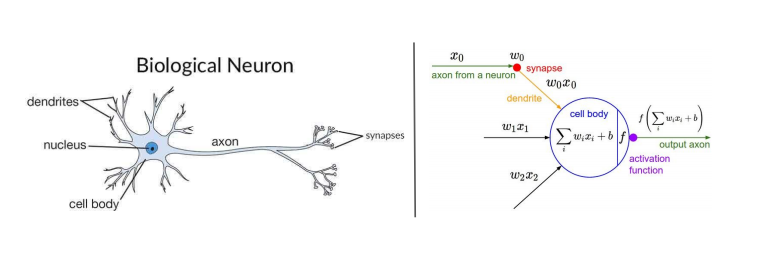

Простейшая нейросеть состоит из **нейронов** - вычислительных узлов. 

<img src="https://i.stack.imgur.com/xqPAc.png" width="400">

$Y = f(w_1*x_1+w_2*x_2+w_3*x_3)$
 

Каждый узел принимает на вход численную информацию **input**($X1, X2, X3$), производит над ней некую арифметическую операцию (**$f(\sum_{i=1}^nw_ix_i)$**) и передает результат **output** ($y$) дальше по сети.

**$w_1, w_2, w_3$** - параметры нейрона, называющиеся **весами**. 


Чтобы добавить к поведению нейрона **нелинейность** (а умножение входных данных $X$ на параметры $w$ - линейная операция), то есть усложнить сеть, используются **функции активации** $f$.

**Примеры:**

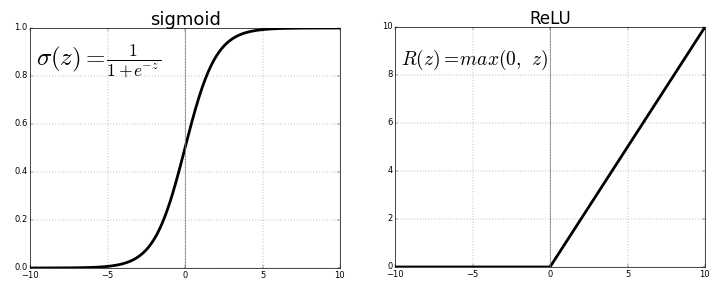


Чтобы оценить поведение нейросети в числах и отразить расхождение между ожидаемым и полученным ответами существуют **функции ошибки**.

**Примеры:**

**Среднеквадратичное отклонение (регрессия):** $MSE(y_1,y_2) = (y_1-y_2)^2$

**Логистическая функция ошибки (классификация):** $LogLoss(y_1,y_2) = -y_1\log(y_2)-(1-y_1)\log(1-y_2)$

### Dense Layer (Полносвязный слой)



Нейроны объеденяются в слои. Из рассмотренной выше модели нейронов получаются **dense** (полносвязные) слои нейронов: все элементы входных данных связаны с каждым нейроном.

Слои нейронов между входными и выходными данными называются **hidden** (скрытыми) слоями. Чем больше слоев, тем **глубже** нейросеть.



<img src="https://neurohive.io/wp-content/uploads/2018/07/neuronnaya-set.gif" width="500">


### Глубокое обучение










Совместное обучение большого числа различных слоев нейросети.

*   Нейросеть можно строить из множества "блоков" (слоев), как конструктор
*   Каждый блок может обладать своей архитектурой, независимо вычисляя выходные данные и градиенты.

<table>
<tr>
<td><img src="https://sun9-30.userapi.com/c205516/v205516565/aa67/iSeJ8ImWr6A.jpg" width="400"></td>
<td><img src="https://img.icons8.com/plasticine/2x/arrow.png" width="200"></td>
<td><img src="https://www.researchgate.net/profile/Max_Ferguson/publication/322512435/figure/download/fig3/AS:697390994567179@1543282378794/Fig-A1-The-standard-VGG-16-network-architecture-as-proposed-in-32-Note-that-only.png" width="500"></td>
</tr>
</table>


## Библиотека Keras

Когда хочется написать какую-нибудь нейросеть, решающую определённую задачу, будь то какая-нибудь простая классификация чего-либо или обнаружение лиц людей на видео. Всё, конечно, всегда начинается со **сбора данных**, а уже потом реализуются модели и проводятся эксперименты.  

Однако люди быстро поняли, что писать свои нейронные сети каждый раз с нуля ну очень уж долго и неразумно, поэтому придумали так называемые **фреймворки** - модули, в которых есть функционал, с помощью которого можно быстро и просто решать типовые задачи, и уже с помощью этих средств писать решения к более сложным задачам.

Есть много различных фреймворков глубокого обучения. Разница между ними прежде всего в том, каков общий принцип вычислений. 

Например, в **Caffe и Caffe2** вы пишете код, по сути, составляя его из готовых "кусочков", как в Lego, в **TensorFlow и Theano** вы сначала объявляете вычислительный граф, потом компилируете его и запускаете, в то время как в **Torch и PyTorch** вы пишете почти точно так же, как на NumPy, а граф вычислений создаётся только при запуске (то есть существует только во время выполнения, потом он "разрушается"). **Keras** позволяет как строить блоки, так и компилировать свой граф.

<img src="https://keras.io/img/keras-logo-small-wb.png" width="300">

* Библиотека для машинного обучения (прежде всего, для обучения нейронных сетей)

* **Keras**  - удобный "пользовательский интерфейс" для более низкоуровневых библиотек (например, TensorFlow) 

* Основные принципы: 
    1. Удобство использования
    2. Модульность
    3. Масштабируемость
    4. Работа с Python
    
Инструмент с низким порогом входа, подходящий как продвинутым исследователям, так и любителям.

**keras** - одна из самых популярных библиотек для глубинного обучения 
(надстройка над другими библиотеками).

**keras** использует библиотеку **tensorflow** от Google, которая позволяет строить нейронные сети с высокой эффективностью и скоростью.
Именно поэтому сейчас **tensorflow** - наиболее популярная библиотека для глубинного обучения.

## MNIST

Построение нейронной сети для решения задачи классификации рукописных цифр
![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

Нам нужно распознать рукописные цифры по их изображениям. Так как цифр 10, то в нашей задаче классификации 10 классов. 

Наш набор данных MNIST часто используются для демонстрации возможностей различных алгоритмов машинного и глубинного обучения, так как для него достаточно просто добиться хорошей точности работы.

In [ ]:
!pip install numpy
!pip install tensorflow
!pip install pandas
!pip install keras

### Процесс анализа данных:
1. Загрузим данные для обучения и тестирования
2. Предобработаем данные
3. Создадим модель для обучения
4. Обучим модель
5. Протестируем модель
6. Попробуем улучшить модель

Загрузим необходимые библиотеки: `keras` для работы с нейросетями, `numpy` для научных вычислений, `matplotlib` для построения графиков. 

* Наша нейронная сеть будет делать ряд последовательных преобразований входных данных, поэтому нам нужен тип нейронных сетей Sequential: импортируем его из раздела `keras.models`.

* Типы преобразваний, с которыми мы будем работать: плотный слой Dense, активация Activation, преобразование картинки в длинный вектор Flatten. Каждое преобразование будет отдельным слоем в последовательной модели, поэтому импортируем их из `keras.layers`

Еще мы будем использовать данные MNIST - они тоже лежат прямо в `keras`, как достать этот датасет рассмотрим дальше.

In [2]:
%tensorflow_version 1.x
# Импортируем сам keras
import keras
# Последовательный тип модели
from keras.models import Sequential
# Импортируем полносвязный слой, слои активации и слой, превращающий картинку в вектор
from keras.layers import Dense, Activation, Flatten
# Импортируем датасеты, чтобы вытащить оттуда нужные нам данные
import keras.datasets

import numpy as np
from matplotlib import pyplot as plt

# Эти библиотеки отключают лишние предупреждения от библиотек, в частности,
# tensorflow, чтобы не засорять вывод наших результатов
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False
import warnings
warnings.filterwarnings("ignore")

# keras является оболочкой для более низкоуровневых библиотек, 
# в нашем случае мы используем tensorflow, у которого на данный момент 
# поддерживаются две версии, установим первую
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

TensorFlow 1.x selected.


Using TensorFlow backend.


Обратим внимание, что вывод ячейки `Using TensorFlow backend.` - это означает, что в качестве бэкэнда используется библиотека для вычисления `tensorflow`.

### Utils

Здесь некоторые дополнительные функции, которые облегчат нам работу с данными. В них разбираться сейчас не будем, только запустим.

In [3]:
def plot_MNIST_samples_grid(image_data, dataset_name='', N=8):
  """
    Эта функция строит NxN самплов из датасета image_data

    Параметры
    ----------
    image_data : array
        Array of shape 
        (number_of_samples, image_width, image_height, number of channels)
        with images
    dataset_name : str
        Name of dataset to write in the title
    N : int
        Size of grid of samples 
  """
  plt.figure(figsize=(10,10))
  data1=image_data[:N*N]
  
  image_width=image_data.shape[1]
  image_heigth=image_data.shape[2]

  if len(data1.shape)==4:
    image_channels=image_data.shape[3]
    data1 = data1.reshape(N, N,image_width,image_heigth, image_channels)
    data1 = np.transpose(data1,(0,2,1,3,4))
    data1 = data1.reshape(N*image_width,N*image_heigth,image_channels)
    plt.imshow(data1)

  elif len(data1.shape)==3:
    data1 = data1.reshape(N, N,image_width,image_heigth)
    data1 = np.transpose(data1,(0,2,1,3))
    data1 = data1.reshape(N*image_width,N*image_heigth)
    plt.imshow(data1,cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.title('First '+ str(N*N) + ' '+dataset_name+ ' samples of training set')
  plt.show()

def plot_MNIST_samples(image_data, label_data, classes,  N=8):
  """
    Эта функция строит N сэмплов каждого класса из датасета image_data

    Параметры
    ----------
    image_data : array
        Array of shape 
        (number_of_samples, image_width, image_height, number of channels)
        with images
    label_data : array
        Array of shape 
        (number_of_samples, )
        with labels
    classes : list
        list with classes names
    dataset_name : str
        Name of dataset to write in the title
    N : int
        Number of samples for each class 
  """
  plt.figure(figsize=(10,N))
  num_classes = len(classes)
  for i, y in enumerate(classes):
      idxs = np.flatnonzero(label_data == y)
      idxs = np.random.choice(idxs, N, replace=False)
      for i, idx in enumerate(idxs):
          plt_idx = i * num_classes + y + 1
          plt.subplot(N, num_classes, plt_idx)
          plt.imshow(image_data[idx], cmap='gray')
          plt.axis('off')
          if i == 0:
              plt.title(str(y))
  plt.show()

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Эта функция выводит confusion matrix.
    Нормализация может быть добавлена изменением значения флага 
    `normalize` на `True`
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ 
    Эта функция показывает 6 картинок с предсказанными и настоящими классами
    """
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)),cmap='gray')
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
    plt.tight_layout()

### 1. Загрузка данных. 

В keras уже есть несколько популярных датасетов, которые можно легко загрузить. Давайте загрузим набор данных MNIST.

In [4]:
# Импортируем модуль датасета MNIST
from keras.datasets import mnist

In [5]:
# Выгрузим тренировочные и тестовые данные при помощи метода load_data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Посмотрим на содержание датасета, вызвав функцию `plot_MNIST_samples`,
которая строит на одной картинке **N** самплов из массива картинок
**X_train** для каждого класса

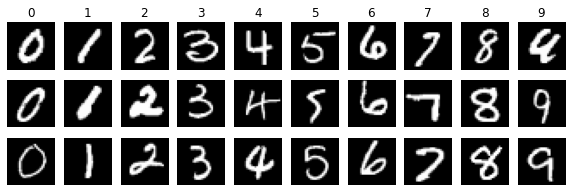

In [ ]:
# Создадим лист с именами классов - цифрами от 0 до 9
classes = list(range(0,10))
plot_MNIST_samples(X_train, y_train, classes, N=3)

In [6]:
x=X_train[10]
type(x)

numpy.ndarray

### 2. Подготовка данных 
**Нормализация значений на [0,1] и перевод целевой переменной в one-hot формат**




Нейронные сети более капризны по сравнению с линейными моделями и моделями на основе решающих деревьев. 

Поэтому им нужна предварительная нормализация данных: чтобы значения всех входных признаков лежали в интервале от $0$ до $1$. 

При этом каждый пиксель картинки представлен в виде целого числа от $0$ до $255$ (для черно-белых картинок) и в виде набора из трех целых чисел от $0$ до $255$ для цветных.

Поэтому нормализацию картинки можно произвести простым делением на $255$.





Еще нейронной сети нужно значение выходной переменной в one-hot формате.

Напомним, что такое **one-hot encoding**. 

Сейчас наша целевая переменная - цифры от $0$ до $9$, то есть $10$ классов. Для каждой картинки наша сеть будет предсказывать вероятность принадлежности к каждому из этих десяти классов. 

Соответственно, истинным значением целевой переменной будет вектор длины $10$, состоящий из $0$ с одной $1$ на месте номера класса, к которому принадлежит картинка (то есть вероятность $1$, что цифра на самом деле принадлежит к конкретному классу).


Это делаем функцией из `keras` `keras.utils.to_categorical`, которая принимает на вход исходный вектор значений выходной переменной и число классов.

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
X_train=X_train/255

In [9]:
X_test=X_test/255

In [10]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [11]:
X_train.min()

0.0

In [12]:
X_train.max()

1.0

In [13]:
y_train=keras.utils.to_categorical(y_train,10)

In [14]:
y_test=keras.utils.to_categorical(y_test,10)

In [15]:
y_test.shape

(10000, 10)

In [16]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [17]:
y_train.shape

(60000, 10)

Посмотрим на то, в каком виде у нас хранятся входные признаки, напечатав размер первого объекта из обучающей выборки (метод **shape**)

Для данных MNIST это изображения 28 на 28.

In [18]:
input_size = X_train[0].shape
input_size

(28, 28)

In [19]:
X_train.shape

(60000, 28, 28)

### 3. Создание модели для обучения

Sequential здесь означает последовательный тип модели, в который мы добавляем слои друг за другом. Инициализируем модель:

In [20]:
# Создаем пустую модель
model = Sequential()

#### Добавляем в модель слой за слоем. 

<img src="https://ml4a.github.io/images/figures/mnist_2layers.png" width="600">


* сначала растягиваем картинку в длинный вектор слоем `Flatten`
* потом идет полносвязный слой - нейроны в следующем слое зависят от всех переменных в предыдущем
* далее используем функцию активации `ReLU`
* потом идет следующий полносвязный слой. В нем $10$ выходов - по числу классов
* в конце используем функцию активации `SoftMax`

**ReLU** - стандартный выбор для функции активации нейронов внутри нейросети. Несмотря на простоту функции, эксперименты показывают, что эта функция активации достаточна для эффективного обучения нейросетей.

<img src="https://qph.fs.quoracdn.net/main-qimg-9e3b87e175577fe97da51fd1a2b50eac" width="400">

**Softmax** - функция активации для выходного слоя нейронов в задачах классификации с числом классов $>2$. Она переводит выходные значения сети в вероятности принадлежности конкретного элемента выборки к одному из класов.

<img src="https://miro.medium.com/max/1812/1*670CdxchunD-yAuUWdI7Bw.png" width="400">



*Важно: в первом слое `Sequential` модели keras необходимо указать размерность входных данных $28*28=784$ , перед активацией делаем плотный слой с размерностью $10$ по числу классов*




In [21]:
# Этот слой превратит нашу двумерную картинку в вектор
model.add(Flatten(input_shape=input_size))

# Добавляем скрытый полносвязный слой из 128 нейронов
model.add(Dense(units=128, input_shape=input_size))
#И активацию для скрытого слоя нейронов
model.add(Activation('relu'))

# Добавляем выходной полносвязный слой из 10 нейронов
model.add(Dense(units=10))
# Чтобы получить на выходе вероятности для каждого класса, выбираем активацию
# softmax
model.add(Activation('softmax'))

После описания архитектуры необходимо скомпилировать модель при помощи метода `compile`, указав минимизируемую функцию потерь (параметр `loss`), 
оптимизатор (параметр `optimizer`, который позаботится об изменении весов модели) и метрику (параметр `metrics`), по которой будет оцениваться точность работы на тестовой выборке в процессе обучения

In [22]:
# Компилируем модель с функцией ошибки categorical entropy, оптимизатором Адам 
# (оптимизатор, который со стандартным набором параметров может обучить эффективную
#  нейросеть), и метрикой - количеством правильно угаданных цифр.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Обучение нейросети

**Обучение** нейросети - изменение **весов** нейронов при помощи **backpropagation** (обратного распространения ошибки).


<img src="https://miro.medium.com/max/1900/1*q1M7LGiDTirwU-4LcFq7_Q.png" width="800">


#### Алгоритм обучения

Подготовительный этап:

1. Разбить датасет на небольшие части (**батчи**), поскольку с точки зрения технических ограничений невозможно пропустить через нейросеть большой датасет целиком

2. Задать начальные значения весов нейросети (можно случайным образом, или конкретными распрелениями, например **Xavier** или **He** инициализации)

Обучение производится по **эпохам**. В каждую эпоху в нейросеть по батчам скармливается весь датасет и пошагово обновляются веса.

##### Эпоха: 

        for Batch in Dataset
            
            1.   Обнулить градиенты весов
            2.   Посчитать значение функции потерь на батче
            3.   Обратное распространение ошибки (посчитать градиенты для весов)
            4.   Обновить веса

Обычно, обучение повторяется много эпох, пока не будут достигнуты определенные условия (достигнуто пороговое значение, например, количество эпох или точность оптимизируемой метрики)

Всю работу по изменению весов и градиентов производит **оптимизатор**.

### 4. Обучение модели
**Тренировка с указанием данных, числа эпох и размера подвыборки** 

Теперь задана структура модели и то, как мы будем ее обучать.
Обучаем ее аналогично `sklearn` - с помощью метода `fit`.

После запуска `fit` параметры оптимизируются градиентым спуском.
На каждом шаге градиентного спуска мы используем функцию потерь, которая подсчитана только по части полной выборки.

Два дополнительных параметра для обучения:
* **batch_size** - размер подвыборки, которая используется для одного шага оптимизации = 40 
* **epochs** - число эпох - сколько раз мы проходим полностью по всей выборке

[Эксперименты](https://arxiv.org/abs/1609.04836) показывают, что выбор **batch_size** в диапазоне $32-512$ в среднем обеспечивает хорошую обобщающую способность нейросети, то есть помогает модели делать лучшие предсказания на новых данных, не присутствующих в тренировочной выборке. 

Количество эпох **epochs** обычно выбирают так, чтобы метрика качества на валидационной выборке не стала убывать (то есть, не произошло переобучения). 

В целом, подбор подобных макропараметров сети является отдельным классом задач, поскольку одна и та же архитектура нейросети может значительно улучшать/ухудшать результаты предсказаний в зависимости от выбранных значений.

In [23]:
# обучаем модель, 8 эпох, размер батча 64
model.fit(X_test, y_test, batch_size=64, epochs=16)


Epoch 1/16
10000/10000 [==============================] - 1s 101us/step - loss: 0.6048 - accuracy: 0.8362
Epoch 2/16
10000/10000 [==============================] - 1s 68us/step - loss: 0.2632 - accuracy: 0.9252
Epoch 3/16
10000/10000 [==============================] - 1s 71us/step - loss: 0.2024 - accuracy: 0.9417
Epoch 4/16
10000/10000 [==============================] - 1s 70us/step - loss: 0.1581 - accuracy: 0.9564
Epoch 5/16
10000/10000 [==============================] - 1s 67us/step - loss: 0.1296 - accuracy: 0.9633
Epoch 6/16
10000/10000 [==============================] - 1s 67us/step - loss: 0.1040 - accuracy: 0.9727
Epoch 7/16
10000/10000 [==============================] - 1s 70us/step - loss: 0.0867 - accuracy: 0.9766
Epoch 8/16
10000/10000 [==============================] - 1s 67us/step - loss: 0.0709 - accuracy: 0.9820
Epoch 9/16
10000/10000 [==============================] - 1s 68us/step - loss: 0.0594 - accuracy: 0.9862
Epoch 10/16
10000/10000 [============================

Еще можно посмотреть на нашу модель в целом: сколько в ней слоев, сколько параметров у каждого слоя с помощью команды model.summary()

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### 5. Валидация качества модели на тестовых данных.
Протестируем модель на тестовой выборке для этого используется метод `evaluate`.
Выводится **loss** и **точность**.

In [25]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
model.evaluate(X_test, y_test, batch_size=46)

10000/10000 [==============================] - 0s 29us/step


[0.012416647981945425, 0.9995999932289124]

## Сверточные нейросети

Слой сверточной сети состоит из **ядра** - окна с весами, которое последовательно проходит по пикселям входящего изображения (на картинке движется ядро размером $3\text{x}3$) и складывает их с соответствующими весами.

<table>
<tr>
<td>
<img src="https://neurohive.io/wp-content/uploads/2018/07/convolutional-neural-network.gif" width="500">
</td>
</tr>
<tr>
<td>
<img src="https://neurohive.io/wp-content/uploads/2018/07/2d-covolutions.gif" width="500">
</td>
</tr>
</table>


<img src="https://i.stack.imgur.com/YDusp.png" width="700">



Таким образом, использование сверток помогает извлекать паттерны на картинке.

Чем глубже сверточный слой, тем более сложные паттерны он способен распознавать:

![](https://raw.githubusercontent.com/MerkulovDaniil/TensorFlow_and_Keras_crash_course/master/rus/2_Deep%20Learning%20and%20Keras/features.png)

#### MaxPool

Слой, похожий на свертку, но вместо суммирования элементов входного изображения с весами ядра, этот слой внутри перемещающегося окна выбирает максимальный элемент и передает его дальше.

Обычно слои **Conv** и **MaxPool** используют в паре, **MaxPool** используется для уменьшения размерности данных.

<table>
<tr>
<td>
<img src="https://mlblr.com/images/maxpool.gif" width="400">
</td>
</tr>
<tr>
<td>
<img src="https://algorithmia.com/blog/wp-content/uploads/2018/03/word-image-5.png" width="500">
</td>
</tr>
</table>







**Padding**- добавление пикселей к исходному изображению, чтобы была возможность сделать свертку на краях изображения.

Обычная практика - заполнение 0 или 1, или режим 'same' - повторение крайних пикселей.

<img src="https://neurohive.io/wp-content/uploads/2018/07/operacija-svertki-neiroseti.gif" width="400">

**Strides** - режим пропускания некоторых областей, над которыми скользит ядро. Strides = 1 означает, что берутся пролеты через пиксель (обычная свертка), Strides = 2 означает, что пролеты совершаются через каждые два пикселя и т.д.

<img src="https://neurohive.io/wp-content/uploads/2018/07/vtoroi-jetap-svertki.gif" width="400">



## Улучшение модели


<img src="https://miro.medium.com/max/3744/1*SGPGG7oeSvVlV5sOSQ2iZw.png" width="700">

Теперь вместо того, чтобы превращать нашу картинку в вектор (из-за чего мы теряем много информации о взаимном расположении пикселей) и отправлять на вход `Dense` слоям, сначала мы произведем свертку изображения при помощи `Conv2D`.

Таким образом мы постараемся извлечь основные паттерны цифр, и только потом результат свертки превратим в вектор и передадим его полносвязной части нейросети.

Добавим явно число каналов в наш датасет - это важно для сверточных слоев. 
т.е. делается преобразование ($60000$, $28$, $28$) -> ($60000$, $28$, $28$, $1$). Это не изменяет общие размеры матриц, но `keras` принимает на вход именно такую структуру данных - если мы используем сверточные слои.

Поскольку наш датасет черно-белый, изображение состоит из одного канала (в отличие от $3$х RGB каналов цветных изображений)


In [27]:
X_train, X_test = X_train.reshape((60000, 28, 28, 1)), X_test.reshape((10000, 28, 28, 1))
input_size = X_train[0].shape
print(input_size)

(28, 28, 1)


Мы используем новый тип преобразования в слое - сверточный `Conv2D`

In [28]:
from keras.layers import Conv2D

Создание модели. `Sequential` здесь снова означает последовательный тип модели, в который мы добавляем слои друг за другом

In [29]:
# Задаем пустую модель
conv_model = Sequential()

Здесь мы используем сверточный слой, который обучает $24$ фильтра размером $3$x$3$ для поиска 
 конкретных геометрических (настраиваемых в процессе обучения) паттернов на входном изображении.


In [30]:
# В начале добавляем сверточный слой, первый параметр - количество фильров (24),
# второй - размер "ядра" - окошка, перемещающегося по входному изображению (3,3),
# padding - добавление пикселей по краям изображения, чтобы сделать свертку на 
# крайних пикселях, режим `same` - повторение края
conv_model.add(Conv2D(24, (3, 3), padding='same', input_shape=input_size))

# Для сверточного слоя тоже нужна активация и ReLU подходит сюда так же, 
# как и для скрытого полносвязного слоя
conv_model.add(Activation('relu'))

# Разворачиваем результат свертки в вектор
conv_model.add(Flatten())

# Добавляем полносвязный скрытый слой, вид активации можно указать сразу 
# в описании Dense слоя, в данном случае - ReLU
conv_model.add(Dense(64, activation='relu'))

# Для выходного полносвязного слоя указываем количество итоговых классов и 
# softmax для активации
conv_model.add(Dense(10, activation='softmax'))

In [31]:
# При помощи метода `summary` мы можем посмотреть,как выглядит наша 
# итоговая архитектура нейросети и количество параметров (весов)
conv_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 24)        240       
_________________________________________________________________
activation_3 (Activation)    (None, 28, 28, 24)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18816)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                1204288   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 1,205,178
Trainable params: 1,205,178
Non-trainable params: 0
_________________________________________________________________


После описания архитектуры необходимо скомпилировать модель, указав минимизируемую функцию потерь, 
оптимизатор и попросив модель выводить точность работы на тестовой выорке в процессе обучения


In [32]:
# Компилируем модель с функцией ошибки categorical entropy, оптимизатором Адам 
# (оптимизатор, который со стандартным набором параметров может обучить эффективную
#  нейросеть), и метрикой - количеством правильно угаданных цифр.
conv_model.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

Тренировка с указанием данных, числа эпох и размера подвыборки

In [33]:
conv_model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
60000/60000 [==============================] - 54s 896us/step - loss: 0.1630 - accuracy: 0.9507
Epoch 2/5
60000/60000 [==============================] - 53s 881us/step - loss: 0.0527 - accuracy: 0.9837
Epoch 3/5
60000/60000 [==============================] - 53s 880us/step - loss: 0.0303 - accuracy: 0.9906
Epoch 4/5
60000/60000 [==============================] - 53s 887us/step - loss: 0.0197 - accuracy: 0.9939
Epoch 5/5
60000/60000 [==============================] - 53s 881us/step - loss: 0.0133 - accuracy: 0.9955


Проверим качество работы модели на тестовых данных. Выводится loss и точность.

In [34]:
conv_model.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 199us/step


[0.06697529969769385, 0.98089998960495]

#### Получение предсказаний классов на основе выходных данных нейросети

Как мы уже поняли, выходной слой нейросети возвращает нам вектор длиной $10$ (количество классов) с **вероятностями** принадлежности данного объекта каждому классу. Как же нам получить итоговые предсказания, то есть сами **номера классов**? 


Верифицируем, что полученное значение точности модели соответствует точности модели, которую мы получим с помощью обычной кобминации подсчета прогноза и затем вызова функции accuracy_score.

In [35]:
# Импортируем знакомую нам функцию подсчета accuracy
from sklearn.metrics import accuracy_score


# Метод predict модели возвращает выходные значения последнего слоя нейросети 
# То есть y_test_predictions сейчас содержит len(X_test) векторов 
# предсказанных вероятностей
y_test_predictions = conv_model.predict(X_test)

# y_test содержит one-hot формат исходных классов, то есть вероятности 1, стоящие 
# в элементах вектора, отвечающих за правильный номер класса

# Получим предсказанные номера классов, попросив выдать нам номера выходного вектора,
# содержащие самые большие вероятности (то есть тот класс, в котором сеть уверена
#                                       с наибольшей вероятностью)
# Это делается при помощи функции np.argmax. Аргумент axis показывает, 
# что нас интересует поиск максимальных значений не среди всей выборки (axis=0), 
# а среди 10ти классов (axis=1)

y_predicted_classes=np.argmax(y_test_predictions, axis=1)
y_real_classes=np.argmax(y_test, axis=1)

#посчитаем точность наших предсказаний
print(accuracy_score(y_real_classes, y_predicted_classes))

0.9809


## Переобучение. Dropout

Иногда нейросеть вместо того, чтобы "понять" общие паттерны данных просто "заучивает" обучающую выборку: на тренировочной части датасета модель правильно угадывает принадлежность к классу, а на валидационном датасете результативность в разы снижается.

**Dropout** - техника спасения нейросетей от переобучения, при которой в процессе тренировки случайно "выключаются" некоторые нейроны из моделей.

Альтернативный взгляд - вместо тренировки одной большой сети проходит одновременная тренировка нескольких подсетей меньшего размера, результаты которых потом усредняются (в каком то смысле, сглаживаются).

![](https://github.com/MerkulovDaniil/TensorFlow_and_Keras_crash_course/blob/master/rus/2_Deep%20Learning%20and%20Keras/dropout.gif?raw=true)

Давайте попробуем посмотреть, как написать сеть, состоящую из нескольких сверточных слоев с использованием `dropout` на `keras`

### 7. Модель из нескольких сверточных слоев с дропаутами

In [36]:
from keras.layers import Conv2D, MaxPooling2D, Dropout


# Все так же, создаем модель
cnn = Sequential()

# Начинаем со сверточного слоя, указывая тип активации на выходе из него и способ заполнения краев (padding)
cnn.add(Conv2D(64, (3, 3), input_shape=input_size, activation='selu', padding='same'))


# Слой dropout, который на каждом шаге "выключает" 25% случайно выбранных нейронов
cnn.add(Dropout(0.25))

# Еще сверточный слой
cnn.add(Conv2D(32, (3, 3), activation='selu', padding='same'))
# Здесь мы используем метод MaxPooling, который уменьшает размер обрабатываемого изображения, 
# выбирая из 4 пикселей 1 с максимальным значением, чтобы это быстрее считалось. (2,2) -> 1
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Dropout(0.5))

# Последний слой необходим для классификации, но перед ним необходимо векторизовать данные
cnn.add(Flatten())
cnn.add(Dense(10, activation='softmax'))

# Компилируем модель с функцией ошибки categorical entropy, оптимизатором Адам 
# (оптимизатор, который со стандартным набором параметров может обучить эффективную
#  нейросеть), и метрикой - количеством правильно угаданных цифр.
cnn.compile(loss='categorical_crossentropy',
                  optimizer = 'nadam',
                  metrics = ['accuracy'])

In [37]:
#Посмотрим, из чего у нас состоит итоговая архитектура
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [38]:
# При помощи fit натренируем 5 эпох нашу модель с размером батча 128
# На выходе мы получим натренированную модель и структуру history_cnn, 
# из которой можно достать значения функции ошибки и метрик качества

history_cnn = cnn.fit(X_train, y_train,
      batch_size=128,
      epochs=5,
      validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 316s 5ms/step - loss: 0.2499 - accuracy: 0.9240 - val_loss: 0.1274 - val_accuracy: 0.9600
Epoch 2/5
60000/60000 [==============================] - 316s 5ms/step - loss: 0.1353 - accuracy: 0.9613 - val_loss: 0.0712 - val_accuracy: 0.9787
Epoch 3/5
60000/60000 [==============================] - 317s 5ms/step - loss: 0.1245 - accuracy: 0.9644 - val_loss: 0.0842 - val_accuracy: 0.9759
Epoch 4/5
60000/60000 [==============================] - 316s 5ms/step - loss: 0.1148 - accuracy: 0.9676 - val_loss: 0.0765 - val_accuracy: 0.9785
Epoch 5/5
60000/60000 [==============================] - 316s 5ms/step - loss: 0.1135 - accuracy: 0.9683 - val_loss: 0.0832 - val_accuracy: 0.9761


In [39]:
# history_cnn.history - словарь, содержащий значения функции ошибки и точности 
# на трейновой и тестовой выборках каждую эпоху
history_cnn.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

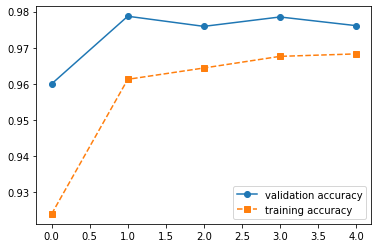

In [40]:
# Построим графики точности на валидационной (val_accuracy) и трейновой (accuracy) выборках
# в конце каждой эпохи обучения

plt.plot(history_cnn.history['val_accuracy'], '-o', label='validation accuracy')
plt.plot(history_cnn.history['accuracy'], '--s', label='training accuracy')
plt.legend();

In [41]:
# Выведем метрики качества нашей нейросети (функцию ошибки и точность)
# для тестовой выборки
cnn.evaluate(X_test, y_test)

10000/10000 [==============================] - 14s 1ms/step


[0.08322446500346996, 0.9761000275611877]

## Confusion matrix

Мы получили неплохой результат. Но все-таки модель ошибается. Попробуем построить **confusion matrix** - таблицу, которая покажет, в каких именно классах ошиблась наша модель и сколько раз.

В идеальном случае 100% точности в **confusion matrix** элементы должны стоять только по диагонали (элементы всех классов угаданы верно), внедиагональные элементы показывают количество картинок правильного класса, предсказанные как неверные.

In [42]:
# Предсказания модели cnn для тестового датасета X_test 
Y_pred = cnn.predict(X_test)

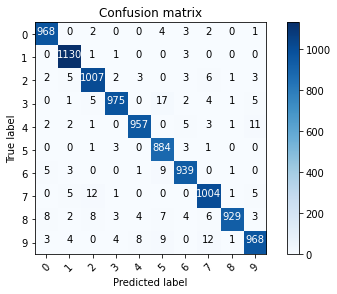

In [43]:
# Y_pred сейчас представляет собой набор векторов из 10 элементов
# Каждое значение вектора Y_pred[i] - вероятность, с которой цифра из тестовой выборки X_test[i] принадлежит одному из 10 классов
# Соответственно, номер элемента вектора с наибольшой вероятностью и есть класс, к которому принадлежит цифра

# Y_pred_classes - содержит предсказанные номера классов для каждого X_test[i]
# Подсказка: для нахождения номера максимального элемента в векторе Y_pred можно использовать функцию np.argmax()
Y_pred_classes = Y_pred.argmax(1)

# Y_true - содержит настоящие номера классов для каждого X_test[i]
# в y_test лежат one-hot-encoded представления классов X_test[i]
# Y_true можно найти аналогично Y_pred_classes при помощи np.argmax()
Y_true = y_test.argmax(1)

# Считаем confucion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Строим confucion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

#### Самые неточные предсказания

Посмотрим врагам в лицо и нарисуем те цифры датасета, в которых наша модель больше всего ошиблась.

In [44]:
# Найдем вектор ошибок, который для каждого предсказания Y_pred_classes[i] 
# будет содержать значение True, если модель ошиблась и False, если угадала Y_true[i] верно
# Подсказка: в python оператор сравнения двух величин a и b "!=" принимает значение True,
# если a не равно b и False, если a равно b, при этом  a и b могут быть векторами

errors = (Y_pred_classes != Y_true)

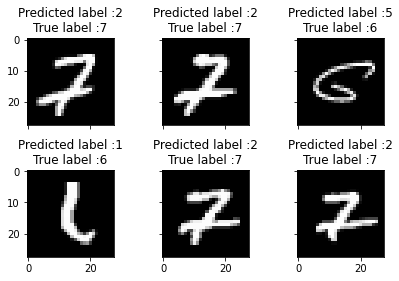

In [45]:
# Выделим из векторов предсказаний и настоящих лейблов только те,
# где нейросеть допустила ошибку
Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_test[errors]

# Вероятности неправильно предсказанных классов
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Вероятности, соответствующие правильным классам
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Разница вероятностей правильного и неправильного классов
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Отсортированный списоц разниц вероятностей
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# 6 наибольших ошибок
most_important_errors = sorted_dela_errors[-6:]

# Построим самые ошибочные цифры
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

## Улучшение модели (попрактикуйтесь самостоятельно)

Попробуйте "поиграться" с параметрами нейросетевого конструктора.

Примеры того, что можно сделать:

1.   Увеличить глубину модели (добавить больше сверточных Conv2D слоев)
2.   Добавить больше Dense слоев  (с ReLU активацией) после Flatten слоя
3.   Поменять параметры сверточных слоев (strides, padding, activation)
4.   Увеличить количество эпох для тренировки или размер батча

Попробуйте достичь точности >99.5% на тестовой выборке.



In [ ]:
best_cnn = Sequential()

best_cnn.add(Conv2D(64, (3, 3), input_shape=input_size, activation='relu', padding='same'))

#...


best_cnn.add(Flatten())

#...

best_cnn.add(Dense(10, activation='softmax'))


best_cnn.compile(loss='categorical_crossentropy',
                  optimizer = 'nadam',
                  metrics = ['accuracy'])

In [ ]:
best_cnn.summary()

In [ ]:
## здесь должны быть параметры вашей модели
history_cnn = best_cnn.fit(X_train, y_train,
      batch_size= ,#например, 128
      epochs= ,#например, 12
      validation_data=(X_test, y_test))

In [ ]:
best_cnn.evaluate(X_test, y_test)

## Выводы





1.   Мы познакомились с **нейросетями** и основными терминами - **нейрон**, **слои**, **функция активации**, **функция ошибки (loss)**, **обучение/тренировка**, **батч**, **эпоха**...

2.   Начали учиться работать с библиотекой для нейронных сетей **`keras`**

3.   На примере одного из самых популярных датасетов черно-белых картинок **MNIST** посмотрели, как строить нейросети для задачи **классификации**

4.  Узнали разницу между **полносвязными Dense** и **сверточными Conv2D** слоями нейросетей и поняли, что свертки позволяют обучать гораздо более эффективные предсказательные модели на изображениях

5.  Получили представление о **переобучении** нейросетей и узнали один из способов увеличения обобщающей способности модели - **Dropout**

6. Познакомились с новыми слоями нейростей - **Flatten**, превращающим картинку в вектор и  **MaxPooling** - уменьшающим размер изображения после свертки